[Author Link](https://medium.com/fintechexplained/end-to-end-python-implementation-of-finding-optimised-efficient-investment-portfolios-8d12693f537d)

In [ ]:
#code block from article
end_date = settings.get_end_date()
start_date = settings.get_start_date(end_date)
closing_prices = price_extractor.get_prices(settings.PriceEvent, start_date, end_date)
#plot stock prices & save data to a file
cp.plot_prices(closing_prices)    
fr.save_to_file(closing_prices, 'StockPrices')

returns = settings.DailyAssetsReturnsFunction(closing_prices, settings.ReturnType)
#plot stock prices & save data to a file
cp.plot_returns(returns)
fr.save_to_file(returns, 'Returns')



expected_returns = settings.AssetsExpectedReturnsFunction(returns)
covariance = settings.AssetsCovarianceFunction(returns)
#Plot & Save covariance to file
cp.plot_correlation_matrix(returns)
fr.save_to_file(covariance, 'Covariances')

portfolios_allocations_df = mcs.generate_portfolios(expected_returns, covariance, settings.RiskFreeRate)
portfolio_risk_return_ratio_df = portfolios_allocation_mapper.map_to_risk_return_ratios(portfolios_allocations_df)

scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)[source]

def solve(self, x0, constraints, bounds, covariance):
 return minimize(self.__risk_function, x0,
 args=(covariance), method='SLSQP',
 #prints covergence msgs
 options={'disp': True},
 constraints=constraints,
 bounds=bounds)

x0 = np.ones(self.__portfolio_size) * (1.0 / self.__portfolio_size)
bounds = ((0, 1),) * (self.__portfolio_size)

constraints=[]
constraints.append({'type': 'eq', 'fun': lambda inputs: 1.0 - np.sum(inputs)})
constraints.append({'type': 'eq', 'args': (returns,),
'fun': lambda allocations, returns:
my_return - self.__return_function(returns, allocations)})


optimiser = obj_factory.get_optimiser(targets, len(expected_returns.index))    
portfolios_allocations_df = optimiser.generate_portfolios(expected_returns, covariance, settings.RiskFreeRate)
portfolio_risk_return_ratio_df = portfolios_allocation_mapper.map_to_risk_return_ratios(portfolios_allocations_df)
#plot efficient frontiers
cp.plot_efficient_frontier(portfolio_risk_return_ratio_df)
cp.show_plots()
#save data
print('7. Saving Data')
fr.save_to_file(portfolios_allocations_df, 'OptimisationPortfolios')
fr.close()



TODOs

Ok sort of works now

fix plot sizes

fix up returns matix, drop NAs as I think this kills the the correction calculation

fix up collelation plot

fix up monte-carlo and then go to 10000 values

In [1]:
%pwd



'/Users/Tilt/new_projects/python_finance_Git/PortfolioOptimisation/code'

In [1]:
from settingsClass import settings
from object_factoryClass import object_factory


In [10]:
type(settings)

type

In [2]:
obj_factory = object_factory(settings)
ce = obj_factory.get_companies_extractor()
cp = obj_factory.get_charts_plotter()
mcs = obj_factory.get_portfolio_generator()
fr = obj_factory.get_file_repository()
mc = obj_factory.get_metrics_calculator()

print('1. Get companies')
companies = ce.get_companies_list()

price_extractor = obj_factory.get_price_extractor(companies)

1. Get companies
Initialised Price Extractor


In [3]:
companies

,Ticker
0,ZM
1,UBER
2,SWI
3,RNG
4,CRWD
5,WORK
6,SYMC


In [4]:
print('2. Get company stock prices')
    
end_date = settings.get_end_date()
start_date = settings.get_start_date(end_date)
closing_prices = price_extractor.get_prices(settings.PriceEvent, start_date, end_date)
closing_prices.head()

2. Get company stock prices
Fetched prices for: ZM
Fetched prices for: UBER
Fetched prices for: SWI
Fetched prices for: RNG
Fetched prices for: CRWD
Fetched prices for: WORK
Issue getting prices for: SYMC


,ZM,UBER,SWI,RNG,CRWD,WORK
Date,,,,,,
2019-04-18,62.000000,NaN,18.629999,105.500000,NaN,NaN
2019-04-22,65.699997,NaN,19.059999,108.379997,NaN,NaN
2019-04-23,69.000000,NaN,19.469999,111.309998,NaN,NaN
2019-04-24,63.200001,NaN,19.719999,111.599998,NaN,NaN
2019-04-25,65.000000,NaN,19.400000,113.160004,NaN,NaN


In [5]:
closing_prices.tail()

,ZM,UBER,SWI,RNG,CRWD,WORK
Date,,,,,,
2020-01-13,74.029999,34.139999,18.410000,186.690002,58.970001,23.200001
2020-01-14,73.160004,34.840000,18.430000,185.789993,59.240002,22.280001
2020-01-15,76.940002,35.009998,18.430000,189.710007,60.250000,22.330000
2020-01-16,76.110001,34.680000,18.590000,190.830002,62.240002,22.969999
2020-01-17,75.559998,35.130001,18.889999,192.889999,63.450001,22.459999


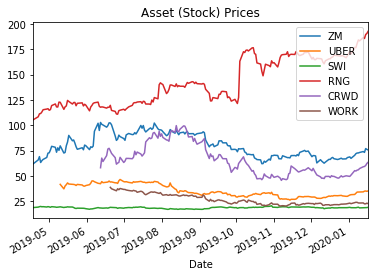

In [6]:
#plot stock prices & save data to a file
cp.plot_prices(closing_prices)  

In [7]:
fr.save_to_file(closing_prices, 'StockPrices')

3. Calculate Daily Returns


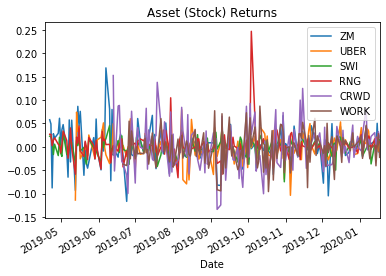

In [8]:
print('3. Calculate Daily Returns')    
returns = settings.DailyAssetsReturnsFunction(closing_prices, settings.ReturnType)
#plot stock prices & save data to a file
cp.plot_returns(returns)
fr.save_to_file(returns, 'Returns')

In [9]:
returns.tail()

,ZM,UBER,SWI,RNG,CRWD,WORK
Date,,,,,,
2020-01-13,0.012779,0.003815,0.005993,0.017344,0.030475,0.003454
2020-01-14,-0.011822,0.020296,0.001086,-0.004833,0.004568,-0.040463
2020-01-15,0.050377,0.004868,0.000000,0.020880,0.016906,0.002242
2020-01-16,-0.010846,-0.009471,0.008644,0.005886,0.032495,0.028258
2020-01-17,-0.007253,0.012892,0.016009,0.010737,0.019254,-0.022453


4. Calculate Expected Mean Return & Covariance


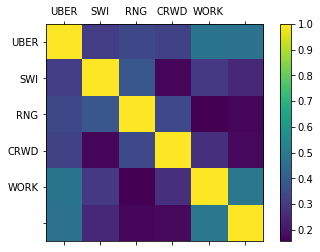

In [10]:
print('4. Calculate Expected Mean Return & Covariance')
expected_returns = settings.AssetsExpectedReturnsFunction(returns)
covariance = settings.AssetsCovarianceFunction(returns)
#Plot & Save covariance to file
cp.plot_correlation_matrix(returns)
fr.save_to_file(covariance, 'Covariances')

In [11]:
expected_returns

ZM      0.263724
UBER   -0.243778
SWI     0.018479
RNG     0.804545
CRWD    0.148894
WORK   -0.935566
dtype: float64

In [12]:
covariance

,ZM,UBER,SWI,RNG,CRWD,WORK
ZM,0.344961,0.079566,0.054783,0.082796,0.175418,0.126262
UBER,0.079566,0.205632,0.048374,0.034723,0.098700,0.059617
SWI,0.054783,0.048374,0.076323,0.042026,0.032263,0.024798
RNG,0.082796,0.034723,0.042026,0.197387,0.095613,0.045899
CRWD,0.175418,0.098700,0.032263,0.095613,0.595671,0.200513
WORK,0.126262,0.059617,0.024798,0.045899,0.200513,0.304976


In [14]:
from mappers import portfolios_allocation_mapper

In [18]:
settings.NumberOfPortfolios = 100000#0

In [19]:
print('5. Use Monte Carlo Simulation')
#Generate portfolios with allocations
portfolios_allocations_df = mcs.generate_portfolios(expected_returns, covariance, settings.RiskFreeRate)
portfolio_risk_return_ratio_df = portfolios_allocation_mapper.map_to_risk_return_ratios(portfolios_allocations_df)

5. Use Monte Carlo Simulation
Completed Generating 0Portfolios
Completed Generating 1Portfolios
Completed Generating 2Portfolios
Completed Generating 3Portfolios
Completed Generating 4Portfolios
Completed Generating 5Portfolios
Completed Generating 6Portfolios
Completed Generating 7Portfolios
Completed Generating 8Portfolios
Completed Generating 9Portfolios


/Users/Tilt/new_projects/python_finance_Git/PortfolioOptimisation/code/calculator.py:35: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  return df.ix[df['SharpeRatio'].astype(float).idxmax()]
/Users/Tilt/new_projects/python_finance_Git/PortfolioOptimisation/code/calculator.py:39: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  return df.ix[df['Risk'].astype(float).idxmin()]


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

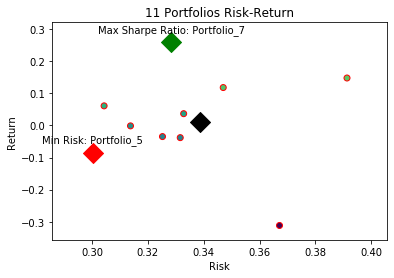

In [16]:
#Plot portfolios, print max sharpe portfolio & save data
cp.plot_portfolios(portfolio_risk_return_ratio_df)
max_sharpe_portfolio = mc.get_max_sharpe_ratio(portfolio_risk_return_ratio_df)['Portfolio']
max_shape_ratio_allocations = portfolios_allocations_df[[ 'Symbol', max_sharpe_portfolio]]
print(max_shape_ratio_allocations)
fr.save_to_file(portfolios_allocations_df, 'MonteCarloPortfolios')
fr.save_to_file(portfolio_risk_return_ratio_df, 'MonteCarloPortfolioRatios')   